In [47]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mstats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


In [30]:
data = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [31]:
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula.
lms = smf.ols(formula=linear_formula, data=data).fit()

In [32]:
lms.params

Intercept    2.939
TV           0.046
Radio        0.189
Newspaper   -0.001
dtype: float64

In [33]:
lms.pvalues

Intercept   0.000
TV          0.000
Radio       0.000
Newspaper   0.860
dtype: float64

In [35]:
lms.rsquared

0.8972106381789522

In [36]:
lms.conf_int()

,0,1
Intercept,2.324,3.554
TV,0.043,0.049
Radio,0.172,0.206
Newspaper,-0.013,0.011


In [37]:
#try running tests without newspaper
# compare how results differ

linear_formula = 'Sales ~TV + Radio'
lms = smf.ols(formula=linear_formula, data=data).fit()

In [41]:
lms.params

Intercept   2.921
TV          0.046
Radio       0.188
dtype: float64

In [42]:
lms.pvalues

Intercept   0.000
TV          0.000
Radio       0.000
dtype: float64

In [43]:
lms.rsquared

0.8971942610828956

In [44]:
lms.conf_int()

,0,1
Intercept,2.340,3.502
TV,0.043,0.048
Radio,0.172,0.204


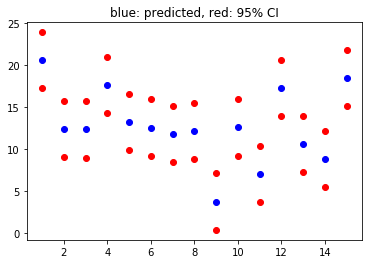

In [49]:
prstd, iv_l, iv_u = wls_prediction_std(lms)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lms.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

# Crime Data for NYC (2013)
"crime1" is the original data set while crime2013 is the new data set tailored t our project, documenting the features from the 
 NYC crime report relevant to this project (Population, Murder, Robber, Property_Crime)

In [50]:


crime1 = pd.read_csv(r'C:/Users/ezzan/Downloads/python_drills/police drill.csv')

crime1 = crime1[0:348]
crime1= crime1.fillna(value=0)

crime2013 = []
crime2013 = crime1[['Population']]
crime2013['Murder'] = crime1[['Murder and\nnonnegligent\nmanslaughter']]
crime2013['Robbery'] = crime1[['Robbery']]
crime2013['Property_Crime'] = crime1[['Property\ncrime']]
crime2013


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying 

,Population,Murder,Robbery,Property_Crime
0,"1,861",0.000,0,12
1,"2,577",0.000,0,24
2,"2,846",0.000,0,16
3,"97,956",8.000,227,"4,090"
4,"6,388",0.000,4,223
5,"4,089",0.000,3,46
6,"1,781",0.000,0,10
7,"118,296",1.000,31,"2,118"
8,"9,519",0.000,4,210
9,"18,182",0.000,12,405


In order to analyze the data significant cleaning had to be done, including removing any non numerical figures and converting all strings into numbers. Additionaly we added a new column of population squared and any time a murder or robbery was documented we lableled it as 1 (robbery was commited) and 0 (was not commited)

In [55]:
crime2013['Population'] = crime2013.Population.str.replace(',','')
crime2013['Property_Crime'] = crime2013.Property_Crime.str.replace(',','')
crime2013['Robbery'] = crime2013.Robbery.str.replace(',','')



AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [56]:

crime2013['Population'] = pd.to_numeric(crime2013['Population'])
crime2013['Robbery'] = pd.to_numeric(crime2013['Robbery'])
crime2013['Murder'] = pd.to_numeric(crime2013['Murder'])
crime2013['Property_Crime'] = pd.to_numeric(crime2013['Property_Crime'])

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [57]:

crime2013['Population_Sqrd'] = np.square(crime2013['Population'])
crime2013['Murder'] = np.where(crime2013['Murder'] >= 1, 1, 0)
crime2013['Robbery'] = np.where(crime2013['Robbery'] >= 1, 1, 0)


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [58]:
crime2013.head()

,Population,Murder,Robbery,Property_Crime,Population_Sqrd
0,1861,0,0,12,3463321
1,2577,0,0,24,6640929
2,2846,0,0,16,8099716
3,97956,1,1,4090,9595377936
4,6388,0,1,223,40806544


In [60]:
crime2013['per_capita'] = crime2013['Property_Crime']/crime2013['Population']
crime2013.drop(216, inplace = True)


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


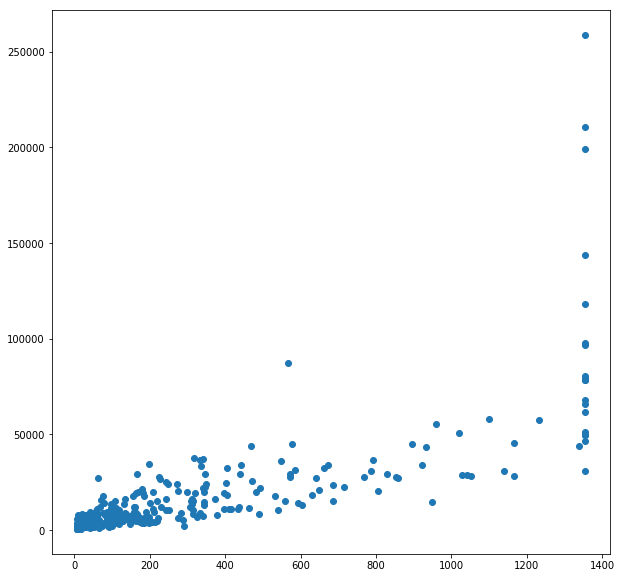

In [62]:
crime2013["Property_Crime"] = mstats.winsorize(crime2013["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(crime2013["Property_Crime"], crime2013["Population"])


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


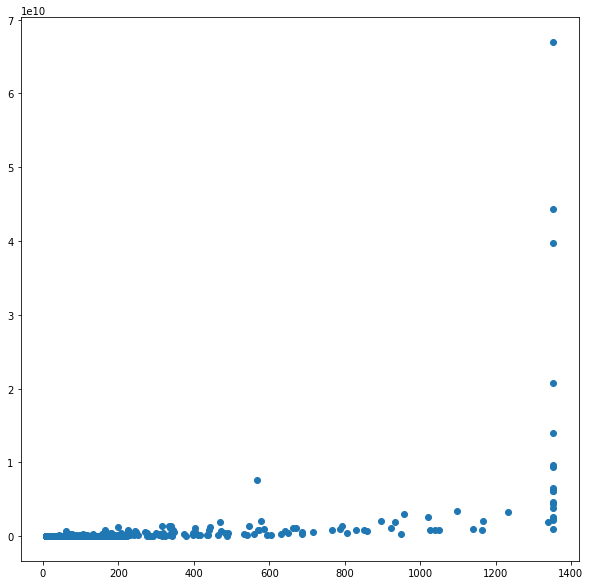

In [63]:
crime2013["Property_Crime"] = mstats.winsorize(crime2013["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(crime2013["Property_Crime"], crime2013["Population_Sqrd"])

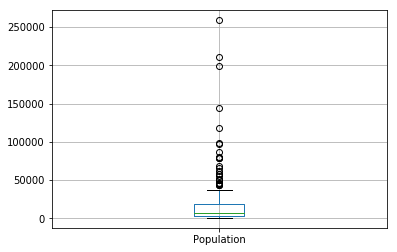

In [64]:
crime2013.boxplot(column = 'Population')

In [81]:
bigcity = crime2013.loc[lambda crime2013: crime2013['Population'] > 100000, :]
smallcity= crime2013.loc[lambda crime2013: crime2013['Population'] < 100000, :]
crime2013['small_city']= crime2013['Population'].apply(lambda x:1 if x > 100000 else 0)
#crime2013['small_city'] = np.where(crime2013['smallcity'] < 100000, 1, 0)
#crime2013['big_city'] = np.where(crime2013['bigcity'] >= 100000, 1, 0)

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
regr = linear_model.LinearRegression()
Y = crime2013["Property_Crime"]
X = crime2013[["Population","small_city", "Murder", "Robbery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients:')
print(regr.coef_)
print('\nIntercept:')
print(regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients:
[ 1.27928605e-02 -1.32491293e+03  1.80950506e+02  1.26215070e+02]

Intercept:
-10.298209418633803

R-squared:
0.7476201553240891


In [83]:
linear_formula = 'Property_Crime ~ Murder+Robbery+small_city+Population'
lms = smf.ols(formula=linear_formula, data=crime2013).fit()

In [84]:
lms.params

Intercept      -10.298
Murder         180.951
Robbery        126.215
small_city   -1324.913
Population       0.013
dtype: float64

In [85]:
lms.pvalues

Intercept    0.520
Murder       0.000
Robbery      0.000
small_city   0.000
Population   0.000
dtype: float64

In [86]:
lms.rsquared

0.7476201553240891

In [87]:
lms.conf_int()

,0,1
Intercept,-41.753,21.157
Murder,114.090,247.811
Robbery,81.665,170.766
small_city,-1588.880,-1060.946
Population,0.011,0.014


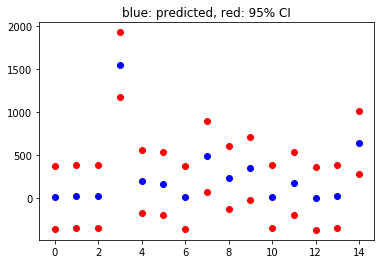

In [88]:
prstd, iv_l, iv_u = wls_prediction_std(lms)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lms.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

#  Data set for NYC Crimes (2014)
We will now introduce a new data set featuring the crimes recorded in different cities in NY oveer the year 2014. All the features in this set are identical to the data set that was recorded above, giving us the ability to perform the same exact test we performed earlier along with the ability to compare the two sets.

In [125]:
crime14 = pd.read_csv('C://Users/ezzan/Downloads/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv')

In [126]:
crime14= crime14[0:369]
crime2014 = crime14.fillna(value=0)
crime2014['Population']= crime14[['Population']]
crime2014['Murder'] = crime14[['Murder and\nnonnegligent\nmanslaughter']]
crime2014['Robbery'] = crime14[['Robbery']]
crime2014['Property_Crime'] = crime14[['Property\ncrime']]
crime2014


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,Murder,Property_Crime
0,Adams Village,"1,851",0,0.000,0,0.000,0,0,11,1,10,0,0.000,0.000,0.000,11
1,Addison Town and Village,"2,568",2,0.000,0,0.000,1,1,49,1,47,1,0.000,0.000,0.000,49
2,Afton Village4,820,0,0.000,0,0.000,0,0,1,0,1,0,0.000,0.000,0.000,1
3,Akron Village,"2,842",1,0.000,0,0.000,0,1,17,0,17,0,0.000,0.000,0.000,17
4,Albany4,"98,595",802,8.000,54,0.000,237,503,"3,888",683,"3,083",122,12.000,0.000,8.000,"3,888"
5,Albion Village4,"5,872",26,0.000,3,0.000,2,21,204,41,159,4,0.000,0.000,0.000,204
6,Alexandria Bay Village4,"1,107",0,0.000,0,0.000,0,0,7,2,5,0,0.000,0.000,0.000,7
7,Alfred Village4,"4,032",11,1.000,1,0.000,0,9,30,6,24,0,0.000,0.000,1.000,30
8,Altamont Village4,"1,723",1,0.000,0,0.000,0,1,2,2,0,0,0.000,0.000,0.000,2
9,Amherst Town4,"118,860",128,1.000,16,0.000,43,68,"2,066",176,"1,846",44,2.000,0.000,1.000,"2,066"


In [127]:
crime2014['Population'] = crime2014.Population.str.replace(',','')
crime2014['Property_Crime'] = crime2014.Property_Crime.str.replace(',','')
crime2014['Robbery'] = crime2014.Robbery.str.replace(',','')
crime2014['Population'] = pd.to_numeric(crime2014['Population'])
crime2014['Robbery'] = pd.to_numeric(crime2014['Robbery'])
crime2014['Murder'] = pd.to_numeric(crime2014['Murder'])
crime2014['Property_Crime'] = pd.to_numeric(crime2014['Property_Crime'])


In [128]:
crime2014['Population_Sqrd'] = np.square(crime2014['Population'])
crime2014['Murder'] = np.where(crime2014['Murder'] >= 1, 1, 0)
crime2014['Robbery'] = np.where(crime2014['Robbery'] >= 1, 1, 0)
crime2014 = crime2014.sort_values('Population',ascending= False)
crime2014.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,Murder,Property_Crime,Population_Sqrd
227,New York4,8473938,"50,564",333.000,"2,190",0.000,1,"31,460","135,747","15,916","112,107","7,724",0.000,0.000,1,135747.000,71807625227844
38,Buffalo4,258419,"3,174",60.000,174,0.000,1,"1,663","12,449","3,119","8,362",968,0.000,0.000,1,12449.000,66780379561
283,Rochester4,210347,"1,765",27.000,190,0.000,1,850,"8,856","2,125","6,058",673,135.000,0.000,1,8856.000,44245860409
366,Yonkers4,200624,974,3.000,33,0.000,1,580,"2,009",414,"1,395",200,15.000,0.000,1,2009.000,40249989376
326,Syracuse4,144534,"1,164",20.000,70,0.000,1,668,"5,755","1,404","3,986",365,57.000,0.000,1,5755.000,20890077156
9,Amherst Town4,118860,128,1.000,16,0.000,1,68,"2,066",176,"1,846",44,2.000,0.000,1,2066.000,14127699600
4,Albany4,98595,802,8.000,54,0.000,1,503,"3,888",683,"3,083",122,12.000,0.000,1,3888.000,9720974025
130,Greece Town4,97144,169,1.000,34,0.000,1,86,"2,430",296,"2,073",61,0.000,0.000,1,2430.000,9436956736
279,Ramapo Town4,88881,64,0.000,6,0.000,1,40,643,89,536,18,2.000,0.000,0,643.000,7899832161
62,Clarkstown Town4,81435,73,1.000,13,0.000,1,33,"1,458",83,"1,348",27,2.000,0.000,1,1458.000,6631659225


## Box plot with all populations (2014)

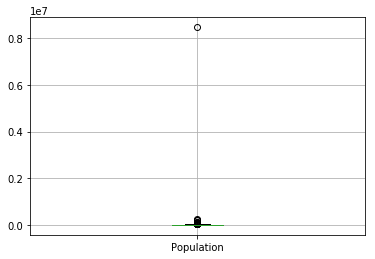

In [129]:
crime2014.boxplot(column = 'Population')

## Box plot with populations under 100,000 (2014)

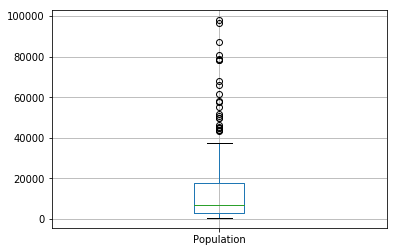

In [130]:
under100k.boxplot(column = 'Population')

In [131]:
crime2014['small_city']= crime2014['Population'].apply(lambda x:1 if x > 100000 else 0)
crime2014= crime2014.dropna()

In [132]:
regr = linear_model.LinearRegression()
Y = crime2014["Property_Crime"]
X = crime2014[["Population","small_city", "Murder", "Robbery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients:')
print(regr.coef_)
print('\nIntercept:')
print(regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients:
[1.56436591e-02 2.88230975e+03 3.58056895e+02 8.15611024e+01]

Intercept:
-34.18650828711088

R-squared:
0.9955362140210262


In [138]:
crime2014

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13,Murder,Property_Crime,Population_Sqrd,small_city
227,New York4,8473938,"50,564",333.000,"2,190",0.000,1,"31,460","135,747","15,916","112,107","7,724",0.000,0.000,1,135747.000,71807625227844,1
38,Buffalo4,258419,"3,174",60.000,174,0.000,1,"1,663","12,449","3,119","8,362",968,0.000,0.000,1,12449.000,66780379561,1
283,Rochester4,210347,"1,765",27.000,190,0.000,1,850,"8,856","2,125","6,058",673,135.000,0.000,1,8856.000,44245860409,1
366,Yonkers4,200624,974,3.000,33,0.000,1,580,"2,009",414,"1,395",200,15.000,0.000,1,2009.000,40249989376,1
326,Syracuse4,144534,"1,164",20.000,70,0.000,1,668,"5,755","1,404","3,986",365,57.000,0.000,1,5755.000,20890077156,1
9,Amherst Town4,118860,128,1.000,16,0.000,1,68,"2,066",176,"1,846",44,2.000,0.000,1,2066.000,14127699600,1
4,Albany4,98595,802,8.000,54,0.000,1,503,"3,888",683,"3,083",122,12.000,0.000,1,3888.000,9720974025,0
130,Greece Town4,97144,169,1.000,34,0.000,1,86,"2,430",296,"2,073",61,0.000,0.000,1,2430.000,9436956736,0
279,Ramapo Town4,88881,64,0.000,6,0.000,1,40,643,89,536,18,2.000,0.000,0,643.000,7899832161,0
62,Clarkstown Town4,81435,73,1.000,13,0.000,1,33,"1,458",83,"1,348",27,2.000,0.000,1,1458.000,6631659225,0


In [133]:
linear_formula = 'Property_Crime ~ Murder+Robbery+Population+small_city'
# Fit the model to our data using the formula.
lms = smf.ols(formula=linear_formula, data=crime2014).fit()

In [134]:
lms. params

Intercept     -34.187
Murder        358.057
Robbery        81.561
Population      0.016
small_city   2882.310
dtype: float64

In [135]:
lms.pvalues

Intercept    0.349
Murder       0.000
Robbery      0.122
Population   0.000
small_city   0.000
dtype: float64

In [139]:
lms.rsquared

0.9955362140210262

In [140]:
lms.conf_int()

,0,1
Intercept,-105.829,37.456
Murder,201.212,514.901
Robbery,-22.030,185.152
Population,0.016,0.016
small_city,2431.151,3333.468


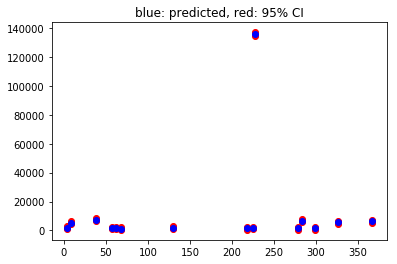

In [142]:
prstd, iv_l, iv_u = wls_prediction_std(lms)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lms.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()